In [1]:
from collections import defaultdict
import numpy as np

minmax_x = [9999999999999, -9999999999999]
minmax_y = [9999999999999, -9999999999999]

pos_dic = defaultdict(lambda: [])
with open("data/dartfish/human2/DARTFISH_DecodedSpots_Hs_OCtx_20180122.csv") as f:
    f.readline()
    for line in f:
        entries = line.rstrip().split(',')
        x = float(entries[4])
        y = float(entries[5])
        g = entries[0]
        pos_dic[g].append([x, y])
        if x < minmax_x[0]:
            minmax_x[0] = x
        if x > minmax_x[1]:
            minmax_x[1] = x
        if y < minmax_y[0]:
            minmax_y[0] = y
        if y > minmax_y[1]:
            minmax_y[1] = y
for g in pos_dic:
    pos_dic[g] = np.array(pos_dic[g])

In [2]:
all_genes = sorted(pos_dic.keys())
mrna_loci = [pos_dic[gene] for gene in all_genes]

In [3]:
minmax_x, minmax_y

([0.2592, 175.7952], [0.216, 5027.22])

In [4]:
width, height = 190, 5050

In [5]:
import ssam

In [7]:
ds = ssam.SSAMDataset(all_genes, mrna_loci, width, height)
analysis = ssam.SSAMAnalysis(ds, ncores=10, save_dir="data/dartfish_human2", verbose=True)

In [8]:
analysis.run_fast_kde(bandwidth=2.5, use_mmap=False)

Processing gene ABCC9...
Processing gene ADAMTS2...
Processing gene ABO...
Processing gene ACOT11...
Processing gene ADAMTSL1...
Processing gene ADCY8...
Processing gene ANKRD18A...
Processing gene ADRA2A...
Processing gene AHRR...
Processing gene ANKRD13A...
Processing gene AOX1...
Processing gene APOD...
Processing gene ASPA...
Processing gene ATP10A...
Processing gene ATP2C2...
Processing gene ATP8B1...
Processing gene B3GAT2...
Processing gene BCL11A...
Processing gene BCL11B...
Processing gene BEND4...
Processing gene BHLHE22...
Processing gene C10orf11...
Processing gene C1QC...
Processing gene C5AR1...
Processing gene CACNA2D2...
Processing gene CALB1...
Processing gene CALB2...
Processing gene CAPN3...
Processing gene CCDC141...
Processing gene CCDC88C...
Processing gene CCK...
Processing gene CCL3...
Processing gene CCR1...
Processing gene CCR5...
Processing gene CD33...
Processing gene CD37...
Processing gene CD83...
Processing gene CDC14A...
Processing gene CDH9...
Processin

Processing gene ZNF804B...


In [9]:
import matplotlib.pyplot as plt

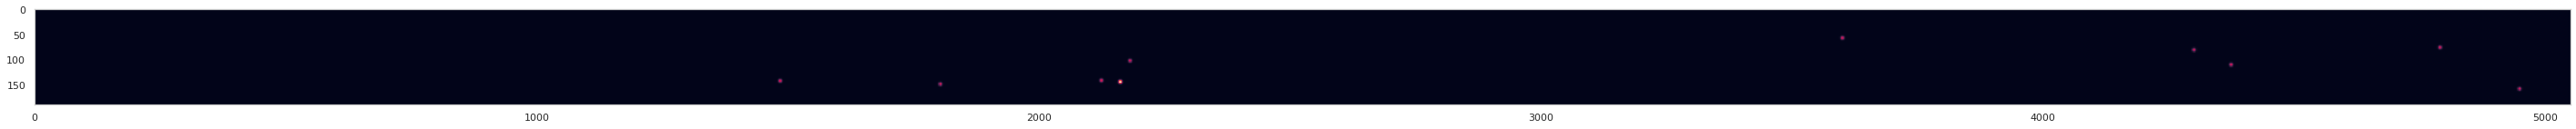

In [11]:
plt.figure(figsize=[50, 5])
plt.imshow(ds.vf[..., 0, 0])